参考: https://www.udemy.com/course/pythonstan/learn/lecture/9132028#overview
# ベイズ更新
今手元にあるデータで取り急ぎ計算し、新たなデータを手にしたときに結果を更新していく、というアプローチを取る。 
観測データが増えていくと事後分布はどうなる? を考える方法。
- データが1個: $p(x|y_1) \propto p(y_1|x)p(x)$
- データが2個: $p(x|y_2) \propto p(y_2|x)\underline{p(y_1|x)p(x)} \propto p(y_2|x)\underline{p(x|y_1)}$  
データが2個の時に、ベイズの定理を利用してデータが1個の時の事後分布を事前分布として利用するということ  
※ ベイズの定理
$$
f(\theta|D) = \frac{f(D|\theta)f(\theta)}{f(D)}
$$
$\theta$: 原因, D: 結果, $f(\theta|D)$: 事後分布, $f(D|\theta)$: 尤度関数, $f(\theta)$: 事前分布, $f(D)$: エビデンス

In [3]:
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
import numpy as np
import pandas as pd
%matplotlib inline
plt.style.use("ggplot")

a の袋には 10 個中 3 個が赤玉  
b の袋には 9 個中 5 個が赤玉  
$\frac{1}{2}$でどちらかの袋を選び、復元抽出で7回取り出すと、その結果が**[青、赤、青、青、赤、赤、赤]**だった。  
この時m選んだ袋はどっちか？

In [22]:
p_a = 3 /10 # 袋 a から赤玉を抽出する確率
p_b = 5 / 9 # 袋 b から赤玉を抽出する確率
p_prior = 0.5 # a, b どちらかの袋を選ぶ確率 (事前分布なので p_pripr)
#  0: 青, 1: 赤
data = [0,1,0,0,1,1,1]

N_data = 4 # ベイズ更新でどこまでのデータを使用するか
for N_data in range(1, 8):
    likehood_a = bernoulli.pmf(data[:N_data], p_a) # a を選択した場合の尤度関数
    likehood_b = bernoulli.pmf(data[:N_data], p_b) # a を選択した場合の尤度関数
    pa_posterior = p_prior
    pb_posterior = p_prior
    pa_posterior *= np.prod(likehood_a)
    pb_posterior *= np.prod(likehood_b)
    norm = pa_posterior + pb_posterior # 規格化定数 
    print(f"======={N_data}個のデータをベイズ更新した場合========")
    print(f"最初に袋 a を選んだ確率は {pa_posterior/norm}")
    print(f"最初に袋 b を選んだ確率は {pb_posterior/norm}")
    print()

=======1個のデータをベイズ更新した場合========
最初に袋 a を選んだ確率は 0.6116504854368932
最初に袋 b を選んだ確率は 0.3883495145631068

=======2個のデータをベイズ更新した場合========
最初に袋 a を選んだ確率は 0.45960551202377736
最初に袋 b を選んだ確率は 0.5403944879762227

=======3個のデータをベイズ更新した場合========
最初に袋 a を選んだ確率は 0.5725650903223393
最初に袋 b を選んだ確率は 0.42743490967766057

=======4個のデータをベイズ更新した場合========
最初に袋 a を選んだ確率は 0.6784329717144618
最初に袋 b を選んだ確率は 0.32156702828553824

=======5個のデータをベイズ更新した場合========
最初に袋 a を選んだ確率は 0.532552275124609
最初に袋 b を選んだ確率は 0.4674477248753911

=======6個のデータをベイズ更新した場合========
最初に袋 a を選んだ確率は 0.38088522289336274
最初に袋 b を選んだ確率は 0.6191147771066373

=======7個のデータをベイズ更新した場合========
最初に袋 a を選んだ確率は 0.2493693215963529
最初に袋 b を選んだ確率は 0.7506306784036472



4個のデータまでベイズ更新した時は、青が3回出ているので、青玉が出る確率の高い a の袋を最初に選んだ確率が高いと推定結果が出ている。  
その後、赤玉が連発するので、徐々に赤玉を多く含む b の袋が選ばれた確率が高まる

([<matplotlib.axis.XTick at 0x4063c41340>,
 [Text(0, 0, 'a'), Text(1, 0, 'b')])

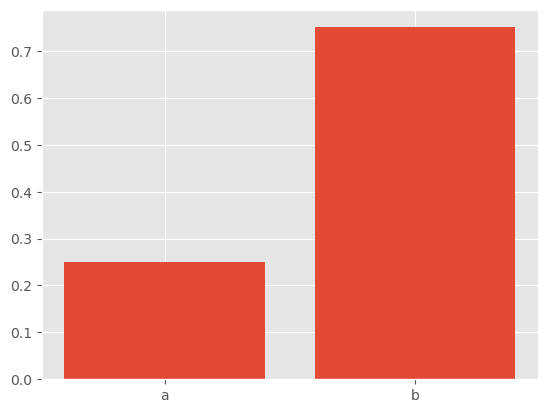

In [23]:
# データの可視化
df = pd.DataFrame([pa_posterior/norm, pb_posterior/norm], columns=["post"])
x = np.arange(df.shape[0])
plt.bar(x, df["post"])
plt.xticks(x, ["a", "b"])